In [11]:
# SE REALIZAN 3 GRÁFICAS DINÁMICAS BARRA/LINEAL CON LAS PREDICCIONES (CATALUÑA - ESPAÑA - COMPARATIVA).
# SE UTILIZA plotly.graph_objects PARA REALIZAR LAS GRÁFICAS DINÁMICAS. 
# FINALMENTE SE ADAPTAN PARA REACT CON SU LENGUAJE.
# CAMBIO A CHART.JS LAS GRÁFICAS DE CAT-ESP EN LA PÁGINA WEB PARA PROBAR DOS BIBLIOTECAS DINÁMICAS. 

In [12]:
import pandas as pd

In [13]:
cat = pd.read_csv('Data_Prediccion_CAT.csv')
cat.tail(1)
# UE - 55% de los residuos municipales en 2025 60% en 2030 y 65% en 2035.

,Any,Població Catalunya,Generació Residus CAT Totals,Total Recollida Selectiva,Total Fracció Resta,RS / RC % Total,FR / RC % Total
35,2035,8978943,3957856,2614231,1343625,66.05,33.95


In [14]:
esp = pd.read_csv('Data_Prediccion_ESP.csv')
esp.tail(1)

,Año,Población España,Total Generado España,Total Recogida Selectiva,Total Resto,RS / RE % Total,FR / RE % Total
22,2035,47871666,23850649,13780816,10069829,57.78,42.22


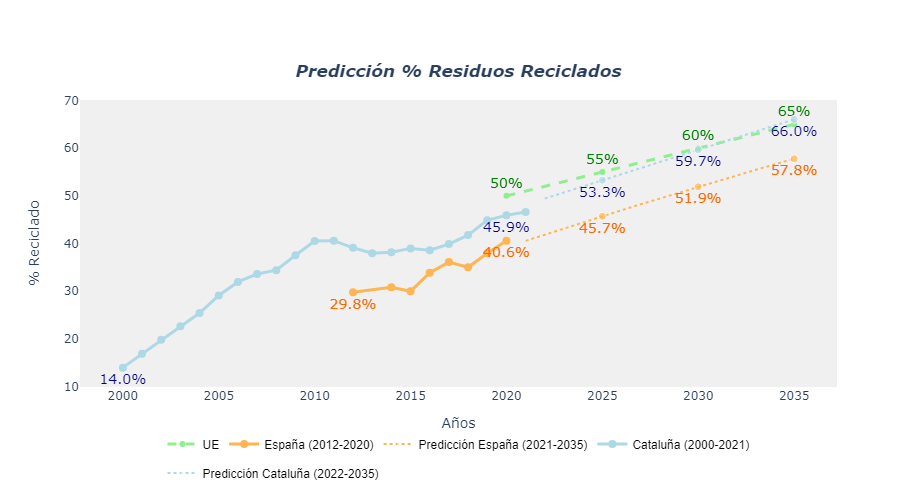

In [18]:
# GRÁFICA LINEAL COMPARATIVA CON DATOS ESP-CAT-Unión Europea. 
import plotly.graph_objects as go

# Datos de España
año_es_1 = esp['Año'][esp['Año'] <= 2020]
rs_rc_percent_es_1 = esp['RS / RE % Total'][esp['Año'] <= 2020]
año_es_2 = esp['Año'][esp['Año'] >= 2021]
rs_rc_percent_es_2 = esp['RS / RE % Total'][esp['Año'] >= 2021]

# Datos de Catalunya
año_cat_1 = cat['Any'][cat['Any'] <= 2021]
rs_rc_percent_cat_1 = cat['RS / RC % Total'][cat['Any'] <= 2021]
año_cat_2 = cat['Any'][cat['Any'] >= 2022]
rs_rc_percent_cat_2 = cat['RS / RC % Total'][cat['Any'] >= 2022]

# Datos de la UE
años_ue = [2020, 2025, 2030, 2035]
rs_rc_percent_ue = [50, 55, 60, 65]

# Colores personalizados para cada línea y texto
colores = {'España': {'linea': 'rgb(255, 181, 82)', 'texto': 'rgb(255, 102, 0)'},
           'Cataluña': {'linea': 'lightblue', 'texto': 'darkblue'},
           'UE': {'linea': 'lightgreen', 'texto': 'green'}}

# Crear figura
fig = go.Figure()

# Línea de la UE
fig.add_trace(go.Scatter(
    x=años_ue,
    y=rs_rc_percent_ue,
    name='UE',
    mode='lines+markers+text',
    text=[f'{round(y, 1)}%' if x in [2020, 2025, 2030, 2035] else '' for x, y in zip(años_ue, rs_rc_percent_ue)],
    textposition='top center',
    textfont=dict(color=colores['UE']['texto'], size=14),
    line=dict(color=colores['UE']['linea'], width=3, dash='dash'),
    showlegend=True,
    visible=True,
    legendgroup='UE',
))

# Gráfico de línea para España (2012-2020)
fig.add_trace(go.Scatter(
    x=año_es_1,
    y=rs_rc_percent_es_1,
    name='España (2012-2020)',
    mode='lines+markers+text',
    line=dict(color=colores['España']['linea'], width=3),
    marker=dict(symbol='circle', size=8, color=colores['España']['linea']),
    text=[f'{round(y, 1)}%' if x in [2012, 2020] else '' for x, y in zip(año_es_1, rs_rc_percent_es_1)],
    textfont=dict(color=colores['España']['texto'], size=14),
    textposition='bottom center',
    showlegend=True,
    visible=True,
    legendgroup='España (2012-2020)',
))

# Gráfico de línea para España (2021-2035)
fig.add_trace(go.Scatter(
    x=año_es_2,
    y=rs_rc_percent_es_2,
    name='Predicción España (2021-2035)',
    mode='lines+markers+text',
    line=dict(color=colores['España']['linea'], width=2, dash='dot'),
    marker=dict(symbol='circle', size=[8 if x in [2025, 2030, 2035] else 0 for x in año_es_2], color=colores['España']['linea']),
    text=[f'{round(y, 1)}%' if x in [2025, 2030, 2035] else '' for x, y in zip(año_es_2, rs_rc_percent_es_2)],
    textfont=dict(color=colores['España']['texto'], size=14),
    textposition='bottom center',
    showlegend=True,
    visible=True,
    legendgroup='Predicción España (2021-2035)',
))

# Gráfico de línea para Catalunya (2000-2021)
fig.add_trace(go.Scatter(
    x=año_cat_1,
    y=rs_rc_percent_cat_1,
    name='Cataluña (2000-2021)',
    mode='lines+markers+text',
    line=dict(color=colores['Cataluña']['linea'], width=3),
    marker=dict(symbol='circle', size=8, color=colores['Cataluña']['linea']),
    text=[f'{round(y, 1)}%' if x in [2000, 2020] else '' for x, y in zip(año_cat_1, rs_rc_percent_cat_1)],
    textfont=dict(color=colores['Cataluña']['texto'], size=14),
    textposition='bottom center',
    showlegend=True,
    visible=True,
    legendgroup='Cataluña (2000-2021)',
))

# Gráfico de línea para Catalunya (2022-2035)
fig.add_trace(go.Scatter(
    x=año_cat_2,
    y=rs_rc_percent_cat_2,
    name='Predicción Cataluña (2022-2035)',
    mode='lines+markers+text',
    line=dict(color=colores['Cataluña']['linea'], width=2, dash='dot'),
    marker=dict(symbol='circle', size=[8 if x in [2025, 2030, 2035] else 0 for x in año_cat_2], color=colores['Cataluña']['linea']),
    text=[f'{round(y, 1)}%' if x in [2025, 2030, 2035] else '' for x, y in zip(año_cat_2, rs_rc_percent_cat_2)],
    textfont=dict(color=colores['Cataluña']['texto'], size=14),
    textposition='bottom center',
    showlegend=True,
    visible=True,
    legendgroup='Predicción Cataluña (2022-2035)',
))

# Configuración del diseño de la figura
fig.update_layout(
    title='<em><b>Predicción % Residuos Reciclados</b></em>',
    title_x=0.5,
    title_y=0.87,
    xaxis=dict(title='Años', showgrid=False, title_font=dict(size=14)),
    yaxis=dict(title='% Reciclado', showgrid=False, title_font=dict(size=14)),
    showlegend=True,
    height=500,
    width=800,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.35,
        xanchor='center',
        x=0.5,
        font=dict(
            family="Arial",
            size=12,
            color="black"
        )
    ),
    plot_bgcolor='white' #color de fondo
)

# Mostrar gráfica interactiva en la web
fig.show()





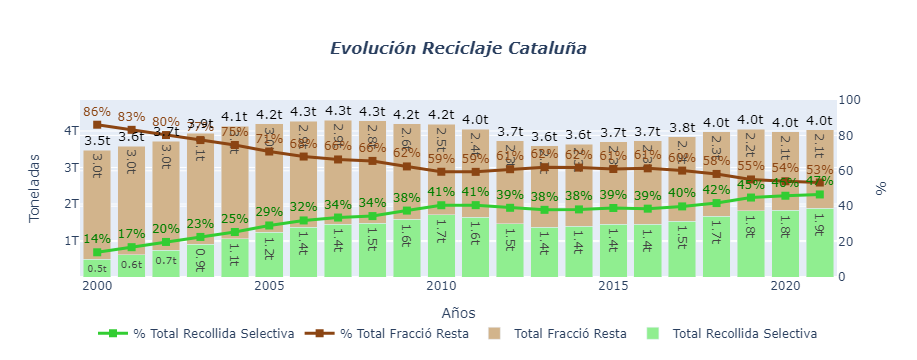

In [19]:
# GRÁFICA BARRAS+LINEAL CON LOS DATOS DE CATALUÑA + PREDICCIONES.
import plotly.graph_objects as go
import pandas as pd


# Filtrar los datos para el rango de años 2000-2021
cat_filtered = cat[(cat['Any'] >= 2000) & (cat['Any'] <= 2021)]

# Crear la figura
fig = go.Figure()

# Agregar la columna "Total Recollida Selectiva" al gráfico
fig.add_trace(go.Bar(
    x=cat_filtered['Any'],
    y=cat_filtered['Total Recollida Selectiva'],
    name='Total Recollida Selectiva',
    marker_color='lightgreen',
    text=[f"{val/1000000:.1f}t" for val in cat_filtered['Total Recollida Selectiva']],
    textposition='auto'
))

# Agregar la columna "Total Fracció Resta" al gráfico
fig.add_trace(go.Bar(
    x=cat_filtered['Any'],
    y=cat_filtered['Total Fracció Resta'],
    name='Total Fracció Resta',
    marker_color='tan',
    text=[f"{val/1000000:.1f}t" for val in cat_filtered['Total Fracció Resta']],
    textposition='auto'
))

# Obtener los totales generados
total_generado = cat_filtered['Generació Residus CAT Totals']

# Configurar las anotaciones
annotations = [
    go.layout.Annotation(
        x=año,
        y=total,
        text=f"{total / 1000000:.1f}t",
        showarrow=False,
        font=dict(color='black', size=13),
        xanchor='center',
        yanchor='bottom'
    )
    for año, total in zip(cat_filtered['Any'], total_generado)
]

# Agregar las anotaciones al gráfico
fig.update_layout(annotations=annotations)

# porcentaje de Total Fracció Resta
porcentaje_fraccio = cat['FR / RC % Total']

# porcentaje de Total Recollida Selectiva s
porcentaje_selectiva = cat['RS / RC % Total']

# Agregar la línea de porcentaje de Total Fracció Resta con marcadores cuadrados
fig.add_trace(go.Scatter(
    x=cat_filtered['Any'],
    y=porcentaje_fraccio,
    name='% Total Fracció Resta',
    mode='lines+markers+text',
    line=dict(color='rgb(139, 69, 19)', width=3),
    marker=dict(symbol='square', size=8, color='rgb(139, 69, 19)'),
    text=[f'{y:.0f}%' for y in porcentaje_fraccio],
    textposition='top center',
    hovertemplate='%{text}',
    textfont=dict(color='rgb(139, 69, 19)'),
    yaxis='y2'
))

# Agregar la línea de porcentaje de Total Recollida Selectiva con marcadores cuadrados
fig.add_trace(go.Scatter(
    x=cat_filtered['Any'],
    y=porcentaje_selectiva,
    name='% Total Recollida Selectiva',
    mode='lines+markers+text',
    line=dict(color='rgb(50, 205, 50)', width=3),
    marker=dict(symbol='square', size=8, color='rgb(50, 205, 50)'),
    text=[f'{y:.0f}%' for y in porcentaje_selectiva],
    textposition='top center',
    hovertemplate='%{text}',
    textfont=dict(color='green'),
    yaxis='y2'
))

# Configurar la posición de las columnas
fig.update_layout(barmode='stack')

# Configurar la leyenda abajo de la gráfica, centrada
fig.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.40,
        xanchor='center',
        x=0.5
    )
)

# Configurar el eje Y en porcentaje
fig.update_layout(
    yaxis=dict(
        title='Toneladas',
        tickformat='.0f',
        ticktext=['1T', '2T', '3T', '4T', '5T'],
        tickvals=[1e6, 2e6, 3e6, 4e6, 5e6]
    ),
    yaxis2=dict(
        tickformat='.0f',
        title='%',
        overlaying='y',
        side='right',
        range=[0, 100],        
    ),
    xaxis=dict(title='Años', showgrid=False, title_font=dict(size=14)),
)

# Configurar el eje X con los años del 2000 al 2021
fig.update_xaxes(range=[1999.5, 2021.5])  # Agregar un margen adicional a los extremos del eje X

# Centrar el título y acercarlo a la gráfica
fig.update_layout(
    title=dict(text="<em><b>Evolución Reciclaje Cataluña</b></em>", x=0.5, y=0.88),
    title_font=dict(size=16),
    margin=dict(t=100)  # Aumentar el margen superior para acercar el título a la gráfica
)

# Mostrar la gráfica
fig.show()




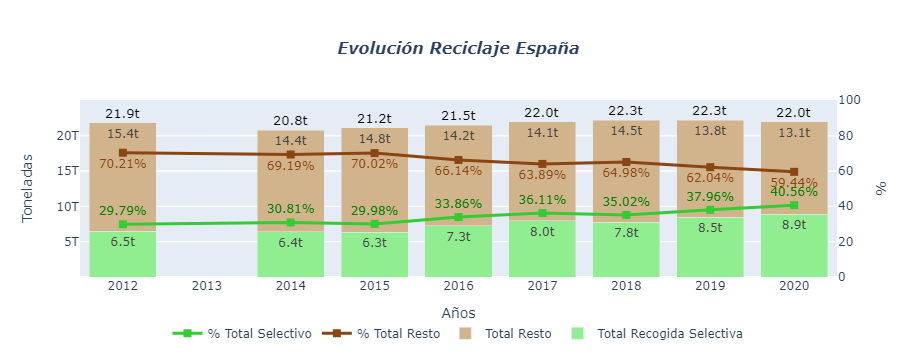

In [21]:
# GRÁFICA BARRAS+LINEAL CON LOS DATOS DE ESPAÑA + PREDICCIONES.

import plotly.graph_objects as go
import pandas as pd

# Filtrar los datos para el rango de años 2012-2020
esp_filtered = esp[(esp['Año'] >= 2012) & (esp['Año'] <= 2020)]

# Crear la figura
fig = go.Figure()

# Agregar la columna "Total Recogida Selectiva" al gráfico
fig.add_trace(go.Bar(
    x=esp_filtered['Año'],
    y=esp_filtered['Total Recogida Selectiva'],
    name='Total Recogida Selectiva',
    marker_color='lightgreen',
    text=[f"{val/1000000:.1f}t" for val in esp_filtered['Total Recogida Selectiva']],
    textposition='auto'
))

# Agregar la columna "Total Resto" al gráfico
fig.add_trace(go.Bar(
    x=esp_filtered['Año'],
    y=esp_filtered['Total Resto'],
    name='Total Resto',
    marker_color='tan',
    text=[f"{val/1000000:.1f}t" for val in esp_filtered['Total Resto']],
    textposition='auto'
))

# Obtener los totales generados
total_generado = esp_filtered['Total Generado España']

# Configurar las anotaciones
annotations = [
    go.layout.Annotation(
        x=año,
        y=total,
        text=f"{total / 1000000:.1f}t",
        showarrow=False,
        font=dict(color='black', size=13),
        xanchor='center',
        yanchor='bottom'
    )
    for año, total in zip(esp_filtered['Año'], total_generado)
]

# Agregar las anotaciones al gráfico
fig.update_layout(annotations=annotations)

# Calcular el porcentaje de Total Resto respecto al Total Generado España
porcentaje_resto = esp_filtered['Total Resto'] / esp_filtered['Total Generado España'] * 100

# Calcular el porcentaje de Total Selectivo respecto al Total Generado España
porcentaje_selectivo = esp_filtered['Total Recogida Selectiva'] / esp_filtered['Total Generado España'] * 100

# Agregar la línea de porcentaje de Total Resto con marcadores cuadrados
fig.add_trace(go.Scatter(
    x=esp_filtered['Año'],
    y=porcentaje_resto,
    name='% Total Resto',
    mode='lines+markers+text',
    line=dict(color='rgb(139, 69, 19)', width=3),
    marker=dict(symbol='square', size=8, color='rgb(139, 69, 19)'),
    text=[f'{y:.2f}%' for y in porcentaje_resto],
    textposition='bottom center',
    hovertemplate='%{text}',
    textfont=dict(color='rgb(139, 69, 19)'),
    yaxis='y2'
))

# Agregar la línea de porcentaje de Total Selectivo con marcadores cuadrados
fig.add_trace(go.Scatter(
    x=esp_filtered['Año'],
    y=porcentaje_selectivo,
    name='% Total Selectivo',
    mode='lines+markers+text',
    line=dict(color='rgb(50, 205, 50)', width=3),
    marker=dict(symbol='square', size=8, color='rgb(50, 205, 50)'),
    text=[f'{y:.2f}%' for y in porcentaje_selectivo],
    textposition='top center',
    hovertemplate='%{text}',
    textfont=dict(color='green'),
    yaxis='y2'
))

# Configurar la posición de las columnas
fig.update_layout(barmode='stack')

# Configurar la leyenda abajo de la gráfica, centrada
fig.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.40,
        xanchor='center',
        x=0.5
    )
)

# Configurar el eje Y en porcentaje
fig.update_layout(
    yaxis=dict(
        title='Toneladas',
        tickformat='.0f',
        ticktext=['5T', '10T', '15T', '20T'],
        tickvals=[5e6, 10e6, 15e6, 20e6]
    ),
    yaxis2=dict(
        tickformat='.0f',
        title='%',
        overlaying='y',
        side='right',
        range=[0, 100],
    ),
    xaxis=dict(title='Años', showgrid=False, title_font=dict(size=14)),
)



# Centrar el título y acercarlo a la gráfica
fig.update_layout(title=dict(text="<em><b>Evolución Reciclaje España</b></em>", x=0.5, y=0.88), title_font=dict(size=16))

# Mostrar la gráfica
fig.show()